# MNIST Handwritten Digits Classifier

In [0]:
import keras                       # import keras, our machine learning library
import numpy as np                 # import numpy, our linear algebra library
import matplotlib.pyplot as plt    # import matplotlib, our graph plotting library

Using TensorFlow backend.


In [0]:
# set root directorty of all MNIST models
model_root_dir = './'

# get data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(model_root_dir+'MNIST_data', one_hot=True)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
image_size = 28         # image dimension size, using square images
num_classes = 10        # number of different digits written

In [0]:
batch_size = 100        # number of images fed in to each training step
learning_rate = 0.5     # learning rate

epochs = 2              # number of times we feed in the data set

In [0]:
# reset session
# this is so you dont have to reset kernal and run whole notebook
# you can run from here to give keras and tensorflow a blank canvas
keras.backend.clear_session()

In [0]:
# create model
model = keras.models.Sequential()

# a single fully connected layer with softmax activation
model.add(keras.layers.Dense(units=num_classes,
                             activation='softmax',
                             input_shape=(image_size**2,)))

# show model structure
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [0]:
# define loss function
# define optimizer
# also return accuracy as a performance metric
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=learning_rate),
              metrics=['accuracy'])

In [0]:
# train model
history = model.fit(x=mnist.train.images, y=mnist.train.labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(mnist.validation.images, mnist.validation.labels))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 2s 28us/step - loss: 0.4028 - acc: 0.8837 - val_loss: 0.2937 - val_acc: 0.9184
Epoch 2/2
55000/55000 [==============================] - 2s 27us/step - loss: 0.3104 - acc: 0.9121 - val_loss: 0.2813 - val_acc: 0.9212


In [0]:
# show evaluation accuracy
score = model.evaluate(mnist.test.images, mnist.test.labels, verbose=0)
print('Test accuracy:', str(round(100*score[1],2))+'%')

Test accuracy: 92.0%


prediction: 2 answer: 2
0 0.219%
1 0.001%
2 95.653%
3 0.333%
4 0.0%
5 1.237%
6 2.431%
7 0.0%
8 0.125%
9 0.0%


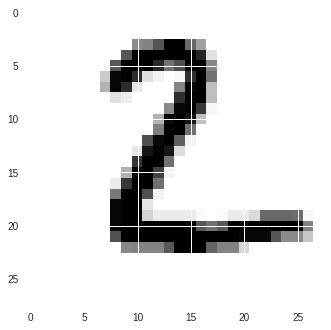

prediction: 6 answer: 6
0 0.225%
1 0.045%
2 4.117%
3 0.786%
4 0.297%
5 0.155%
6 87.548%
7 0.001%
8 6.789%
9 0.035%


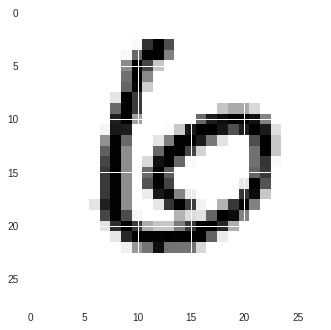

In [0]:
# test and show test images
test_idxs = [1,11]

for test_idx in test_idxs:
    test_x, test_y = mnist.test.images[test_idx].reshape(1,-1), mnist.test.labels[test_idx].reshape(1,-1)

    _prediction = model.predict(test_x)

    print('prediction:', np.argmax(_prediction), 'answer:', np.argmax(test_y))

    for i,val in enumerate(_prediction[0]):
        print(i, str(round((100*val),3))+'%')

    plt.imshow(test_x.reshape(image_size,image_size), cmap='binary')
    plt.grid(False)
    plt.show()